 # Import Packages

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cPickle
sns.set(style='white',palette='muted',color_codes=True)
%matplotlib inline

# Unpickle data

In [2]:
def unpickle(f):
    fo = open(f,'rb')
    d = cPickle.load(fo)
    fo.close()
    return d

# Load CIFAR-10 dataset

In [17]:
def load_cifar10(dir):
    train_data=[]
    train_target=[]
    
    for i in range(1,6):
        d = unpickle('%s/data_batch_%d' %(dir,i))
        train_data.extend(d['data'])
        train_target.extend(d['labels'])
        
    d = unpickle('%s/test_batch' %(dir))
    test_data = d['data']
    test_target = d['labels']
    
    train_data = np.array(train_data,dtype=np.float32)
    train_target = np.array(train_target,dtype=np.int32)
    test_data = np.array(test_data,dtype=np.float32)
    test_target = np.array(test_target,dtype=np.int32)
    
    train_data /=255.0
    test_data /=255.0
    
    return train_data,test_data,train_target,test_target

In [18]:
X_train,X_test,y_train,y_test = load_cifar10("cifar-10-batches-py")

In [19]:
X_train = X_train.reshape((len(X_train),3,32,32))
X_test = X_test.reshape((len(X_test),3,32,32))

(0, 6000)

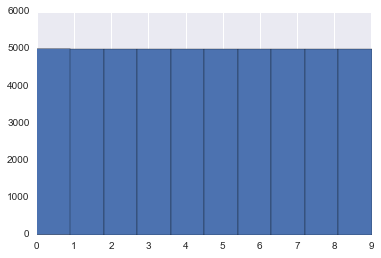

In [24]:
plt.hist(y_train)
plt.xlim(0,9)
plt.ylim(0,6000)

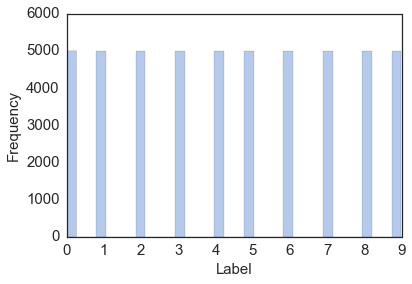

In [55]:
sns.distplot(y_train,kde=False,rug=False,color='b')
plt.ylim(0,6000)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
#plt.title('Distribution of Training Data',fontsize=15)

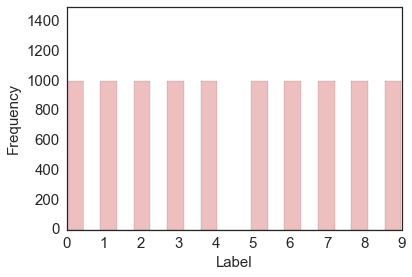

In [56]:
sns.distplot(y_test,kde=False,rug=False,color='r')
plt.ylim(0,1500)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
#plt.title("Distribution of Test Data",fontsize=15)

In [13]:
from keras.utils import np_utils
nb_classes =10

#Change the target values into one-hot vectors 
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

In [14]:
y_test
#y_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.]])

# Import Deep Learning Library

In [15]:
from keras.models import Sequential
from keras.layers import Dense,Activation,MaxPooling2D,Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils
from keras.optimizers import SGD,Adam

# Model 1

In [16]:
batch_size = 32
nb_classes = 10
nb_epoch = 3

model = Sequential()
model.add(Convolution2D(32,3,3,border_mode='same',input_shape=(3,32,32)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(output_dim=512,input_dim=7200,activation='relu'))
model.add(Dense(output_dim=10,input_dim=512))
model.add(Activation('softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(X_train,y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 99s - loss: 1.4811 - acc: 0.4687 - val_loss: 1.2469 - val_acc: 0.5576
Epoch 2/3
50000/50000 [==============================] - 99s - loss: 1.1171 - acc: 0.6052 - val_loss: 1.0874 - val_acc: 0.6163
Epoch 3/3
50000/50000 [==============================] - 98s - loss: 0.9240 - acc: 0.6730 - val_loss: 1.0554 - val_acc: 0.6345


# Model 2

In [ ]:

from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train)

    # fit the model on the batches generated by datagen.flow()
model.fit_generator(datagen.flow(X_train, y_train,
                        batch_size=batch_size),
                        samples_per_epoch=X_train.shape[0],
                        nb_epoch=nb_epoch,
                        validation_data=(X_test, y_test))

In [ ]:
from keras.utils.visualize_util import plot
plot(model, to_file='model.png')

In [ ]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

# Model 3

In [ ]:
model2 = Sequential()
model2.add(Convolution2D(32,3,3,border_mode='same',input_shape=(3,32,32)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Convolution2D(32,3,3,border_mode='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Convolution2D(32,3,3,border_mode='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Convolution2D(32,3,3,border_mode='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Convolution2D(32,3,3,border_mode='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Flatten())
model2.add(Dense(output_dim=512,input_dim=7200,activation='relu'))
model2.add(Dense(output_dim=10,input_dim=512))
model2.add(Activation('softmax'))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

model2.fit(X_train,y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test, y_test),
              shuffle=True)

In [ ]:
SVG(model_to_dot(model2).create(prog='dot', format='svg'))